In [1]:
# initial setup
try:
    # settings colab:
    import google.colab

    ! mkdir -p ../Data
    # los que usan colab deben modificar el token de esta url:
    ! wget -O ../Data/bikes.csv https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_students_2020/master/M3/CLASE_16_Regresion_Lineal_Multiple/Data/bikes.csv?token=AA4GFHIG665I3BPVQCFY3US63APZM
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed


In [2]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16

precios = pd.read_csv('Precios_metales.csv', encoding="iso-8859-1")

In [3]:
preciosPivot = precios.pivot_table('Precio', index='Fecha', columns='Metal')

In [4]:
preciosPivotNoNulos = preciosPivot.dropna()
preciosPivotNoNulos.isnull().sum()

Metal
ALUMINIO (¢/lb)    0
COBRE (¢/lb)       0
ESTAÑO (¢/lb)      0
NIQUEL (¢/lb)      0
ORO (US$/ozt)      0
PLATA (US$/ozt)    0
PLOMO (¢/lb)       0
ZINC (¢/lb)        0
dtype: int64

In [5]:
preciosNormalizados = pd.DataFrame(preciosPivotNoNulos.index.values, columns=["Fecha"])

for column in preciosPivotNoNulos.columns.values:
    pn = pd.Series(preprocessing.scale(preciosPivotNoNulos[column]), name=column)
    preciosNormalizados = pd.concat([preciosNormalizados, pn], axis=1)

In [6]:
preciosNormalizados["FechaDT"] = pd.to_datetime(preciosNormalizados["Fecha"], format='%d/%m/%Y')
preciosNormalizados["Mes/Año"] = preciosNormalizados["FechaDT"].apply(lambda x: str(x.month) + "/" + str(x.year))
preciosNormalizados["Año"] = preciosNormalizados["FechaDT"].apply(lambda x: str(x.year))

In [7]:
preciosNormalizados.head(3)

,Fecha,ALUMINIO (¢/lb),COBRE (¢/lb),ESTAÑO (¢/lb),NIQUEL (¢/lb),ORO (US$/ozt),PLATA (US$/ozt),PLOMO (¢/lb),ZINC (¢/lb),FechaDT,Mes/Año,Año
0,01/02/2001,-0.535903,-1.633474,-1.457953,-1.129280,-1.572724,-1.277029,-1.615941,-1.173559,2001-02-01,2/2001,2001
1,01/02/2002,-1.308858,-1.729690,-1.642264,-1.248841,-1.537992,-1.342598,-1.650945,-1.495843,2002-02-01,2/2002,2002
2,01/02/2005,-0.178346,-1.004496,-1.042540,-0.161796,-1.232263,-1.050515,-0.969883,-0.885172,2005-02-01,2/2005,2005


In [8]:
feature_cols = preciosNormalizados.columns.values[1:]

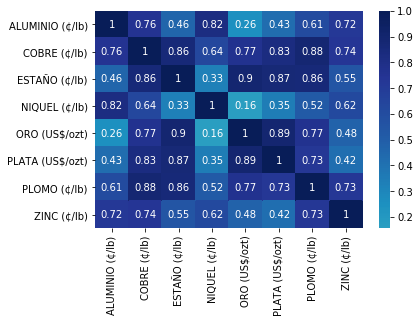

In [9]:
sns.heatmap(preciosNormalizados[feature_cols].corr(), center=0, cmap="YlGnBu", annot=True);

In [10]:
def model_train_test_error(modelo, df, feature_cols, columna_predecir):
    X = df[feature_cols]
    y = df[columna_predecir]
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
    modelo_fit = modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print (feature_cols)
    print ("y_test sample: ",y_test.values[0:10])
    print ("y_pred sample: ",y_pred[0:10].astype(int))
    print ('Metrics.MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('Metrics.MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('Metrics.RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('Metrics.R2:', metrics.r2_score(y_test, y_pred))
    print ("Modelo_fit.r^2:", modelo_fit.score(X_test, y_test))    
    print ('Modelo_fit.Score test: ', modelo_fit.score(X_test, y_test))
    print ('Modelo_fit.Score train: ', modelo_fit.score(X_train, y_train))
    print ("Modelo_fit.coef: ", modelo_fit.coef_)
    print ()
    return

In [11]:
preciosNormalizadosMasNEM = preciosNormalizados

In [20]:
model_train_test_error(
    linear_model.LinearRegression(), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

['ESTAÑO (¢/lb)', 'NIQUEL (¢/lb)', 'COBRE (¢/lb)', 'PLOMO (¢/lb)', 'ZINC (¢/lb)', 'PLATA (US$/ozt)', 'ALUMINIO (¢/lb)']
y_test sample:  [-0.95739365 -0.65520356 -1.33623738 -1.57420655  1.69418062 -0.2868679
  0.79314091  0.59636339  1.59463044 -1.55093393]
y_pred sample:  [ 0  0 -1 -1  1  0  0  0  1 -1]
Metrics.MAE: 0.1736314225514343
Metrics.MSE: 0.055553008831884895
Metrics.RMSE: 0.23569685791686934
Metrics.R2: 0.9430747425426085
Modelo_fit.r^2: 0.9430747425426085
Modelo_fit.Score test:  0.9430747425426085
Modelo_fit.Score train:  0.9441180056083183
Modelo_fit.coef:  [ 0.19875865 -0.18221005  0.31715747  0.09153793  0.23599947  0.51016345
 -0.37214544]



In [21]:
model_train_test_error(
    linear_model.Ridge(alpha=0.5, normalize=False), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

['ESTAÑO (¢/lb)', 'NIQUEL (¢/lb)', 'COBRE (¢/lb)', 'PLOMO (¢/lb)', 'ZINC (¢/lb)', 'PLATA (US$/ozt)', 'ALUMINIO (¢/lb)']
y_test sample:  [-0.95739365 -0.65520356 -1.33623738 -1.57420655  1.69418062 -0.2868679
  0.79314091  0.59636339  1.59463044 -1.55093393]
y_pred sample:  [ 0  0 -1 -1  1  0  0  0  1 -1]
Metrics.MAE: 0.17361130375616407
Metrics.MSE: 0.0555507533006345
Metrics.RMSE: 0.23569207305430215
Metrics.R2: 0.9430770537891068
Modelo_fit.r^2: 0.9430770537891067
Modelo_fit.Score test:  0.9430770537891067
Modelo_fit.Score train:  0.9441179620210668
Modelo_fit.coef:  [ 0.1990228  -0.1821858   0.3166775   0.09167753  0.23586506  0.51006247
 -0.37181677]



In [22]:
model_train_test_error(
    linear_model.Lasso(alpha=0.5, normalize=False), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

['ESTAÑO (¢/lb)', 'NIQUEL (¢/lb)', 'COBRE (¢/lb)', 'PLOMO (¢/lb)', 'ZINC (¢/lb)', 'PLATA (US$/ozt)', 'ALUMINIO (¢/lb)']
y_test sample:  [-0.95739365 -0.65520356 -1.33623738 -1.57420655  1.69418062 -0.2868679
  0.79314091  0.59636339  1.59463044 -1.55093393]
y_pred sample:  [0 0 0 0 0 0 0 0 0 0]
Metrics.MAE: 0.5749614394768996
Metrics.MSE: 0.4039917693223823
Metrics.RMSE: 0.6356034686204775
Metrics.R2: 0.5860289845156988
Modelo_fit.r^2: 0.5860289845156988
Modelo_fit.Score test:  0.5860289845156988
Modelo_fit.Score train:  0.6004819882691548
Modelo_fit.coef:  [0.20181028 0.         0.         0.         0.         0.2267673
 0.        ]



In [23]:
model_train_test_error(
    linear_model.RidgeCV(alphas=np.linspace(0.1, 100, 1000), cv=3, normalize=False,scoring='r2'), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

['ESTAÑO (¢/lb)', 'NIQUEL (¢/lb)', 'COBRE (¢/lb)', 'PLOMO (¢/lb)', 'ZINC (¢/lb)', 'PLATA (US$/ozt)', 'ALUMINIO (¢/lb)']
y_test sample:  [-0.95739365 -0.65520356 -1.33623738 -1.57420655  1.69418062 -0.2868679
  0.79314091  0.59636339  1.59463044 -1.55093393]
y_pred sample:  [ 0  0 -1 -1  1  0  0  0  1 -1]
Metrics.MAE: 0.17340921729751832
Metrics.MSE: 0.055534374010779354
Metrics.RMSE: 0.23565732326999592
Metrics.R2: 0.9430938376737528
Modelo_fit.r^2: 0.9430938376737529
Modelo_fit.Score test:  0.9430938376737529
Modelo_fit.Score train:  0.944112323961281
Modelo_fit.coef:  [ 0.20174247 -0.18193893  0.31178885  0.09312893  0.23443334  0.50895802
 -0.36840607]



In [24]:
model_train_test_error(
    linear_model.LassoCV(alphas=np.linspace(0.01, 100, 1000), cv=3, normalize=False), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

['ESTAÑO (¢/lb)', 'NIQUEL (¢/lb)', 'COBRE (¢/lb)', 'PLOMO (¢/lb)', 'ZINC (¢/lb)', 'PLATA (US$/ozt)', 'ALUMINIO (¢/lb)']
y_test sample:  [-0.95739365 -0.65520356 -1.33623738 -1.57420655  1.69418062 -0.2868679
  0.79314091  0.59636339  1.59463044 -1.55093393]
y_pred sample:  [ 0  0 -1 -1  1  0  0  0  1 -1]
Metrics.MAE: 0.17123404826099137
Metrics.MSE: 0.0556506707813942
Metrics.RMSE: 0.2359039439716814
Metrics.R2: 0.9429746681859443
Modelo_fit.r^2: 0.9429746681859443
Modelo_fit.Score test:  0.9429746681859443
Modelo_fit.Score train:  0.942768766841919
Modelo_fit.coef:  [ 0.23769693 -0.16148036  0.22298567  0.09326453  0.21763246  0.52016339
 -0.31865146]



In [25]:
def model_train_test_error_CrossVal(modelo, df, feature_cols, columna_predecir):
    X = df[feature_cols]
    y = df[columna_predecir]
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
    modelo_fit = modelo.fit(X_train, y_train)
    cv = model_selection.KFold(5, shuffle=False)
    scores = model_selection.cross_val_score(modelo, X_train, y_train, cv=cv, scoring='r2')
    y_pred = model_selection.cross_val_predict(modelo, X_test, y_test, cv=cv)

    if hasattr(modelo, 'alpha_'):
        print(dict(alpha=modelo.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(modelo.coef_ == 0).sum()))
    else:
        print("scores: ", scores)
        print("media de scores", scores.mean())
    return 

In [26]:
model_train_test_error_CrossVal(
    linear_model.LinearRegression(), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

scores:  [0.94632335 0.94063162 0.9441607  0.94681279 0.93953422]
media de scores 0.9434925356637486


In [27]:
model_train_test_error_CrossVal(
    linear_model.RidgeCV(), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

{'alpha': 1.0, 'scores': array([0.94633563, 0.94062574, 0.94415612, 0.94681433, 0.93954009]), 'mean_score': 0.9434943789601666, 'zero_coefs': 0}


In [28]:
model_train_test_error_CrossVal(
    linear_model.LassoCV(), 
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

{'alpha': 0.0009198938771939813, 'scores': array([0.94644333, 0.94056087, 0.94416624, 0.94677383, 0.9394531 ]), 'mean_score': 0.9434794745386383, 'zero_coefs': 0}


In [29]:
def model_train_test_error_statsmodels(df, feature_cols, columna_predecir):
    X = df[feature_cols]
    y = df[columna_predecir]
    X_constant = sm.add_constant(X)
    modelo = sm.OLS(y, X_constant).fit()
    y_pred = modelo.predict(X_constant)
    print (feature_cols)
    print ('Metrics.MAE:', metrics.mean_absolute_error(y, y_pred))
    print ('Metrics.MSE:', metrics.mean_squared_error(y, y_pred))
    print ('Metrics.RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
    print (modelo.summary())
    print ()
    return modelo, y, X_constant, X

['ESTAÑO (¢/lb)', 'NIQUEL (¢/lb)', 'COBRE (¢/lb)', 'PLOMO (¢/lb)', 'ZINC (¢/lb)', 'PLATA (US$/ozt)', 'ALUMINIO (¢/lb)']
Metrics.MAE: 0.1726425765226173
Metrics.MSE: 0.056002846639260306
Metrics.RMSE: 0.2366492058707578
                            OLS Regression Results                            
Dep. Variable:          ORO (US$/ozt)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.156e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:18:53   Log-Likelihood:                 106.94
No. Observations:                4809   AIC:                            -197.9
Df Residuals:                    4801   BIC:                            -146.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                 

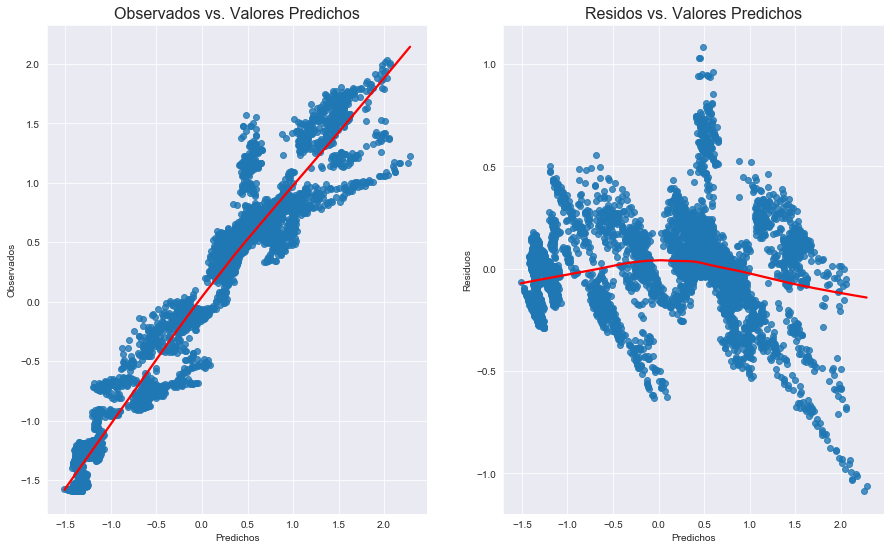

In [30]:
modeloOLS, yOLS, X_constant, X = model_train_test_error_statsmodels(
    preciosNormalizadosMasNEM, 
    ["ESTAÑO (¢/lb)", "NIQUEL (¢/lb)", "COBRE (¢/lb)", "PLOMO (¢/lb)", "ZINC (¢/lb)", "PLATA (US$/ozt)", "ALUMINIO (¢/lb)"], "ORO (US$/ozt)")

import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    funcion para visualizar e identificar supuestos de linealidad sobre la regression lineal
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observados vs. Valores Predichos', fontsize=16)
    ax[0].set(xlabel='Predichos', ylabel='Observados')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residos vs. Valores Predichos', fontsize=16)
    ax[1].set(xlabel='Predichos', ylabel='Residuos')

print ("Linealidad del modelo")
linearity_test(modeloOLS, yOLS)

In [31]:
# Esperanza de los residuos igual a cero.
modeloOLS.resid.mean()

5.651540786613398e-17

In [32]:
# Sin multicolinealidad (perfecta)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,ESTAÑO (¢/lb),NIQUEL (¢/lb),COBRE (¢/lb),PLOMO (¢/lb),ZINC (¢/lb),PLATA (US$/ozt),ALUMINIO (¢/lb)
vif,9.851109,3.520026,18.943415,7.041233,3.403595,6.589172,5.292628


Homocedasticidad (varianza igual) de residuos

 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   5.387436e+02
p-value                        3.729421e-112
f-value                         8.652904e+01
f p-value                      4.887448e-119

 Goldfeld-Quandt test ----
                value
F statistic  0.996791
p-value      0.531346

 Residuals plots ----


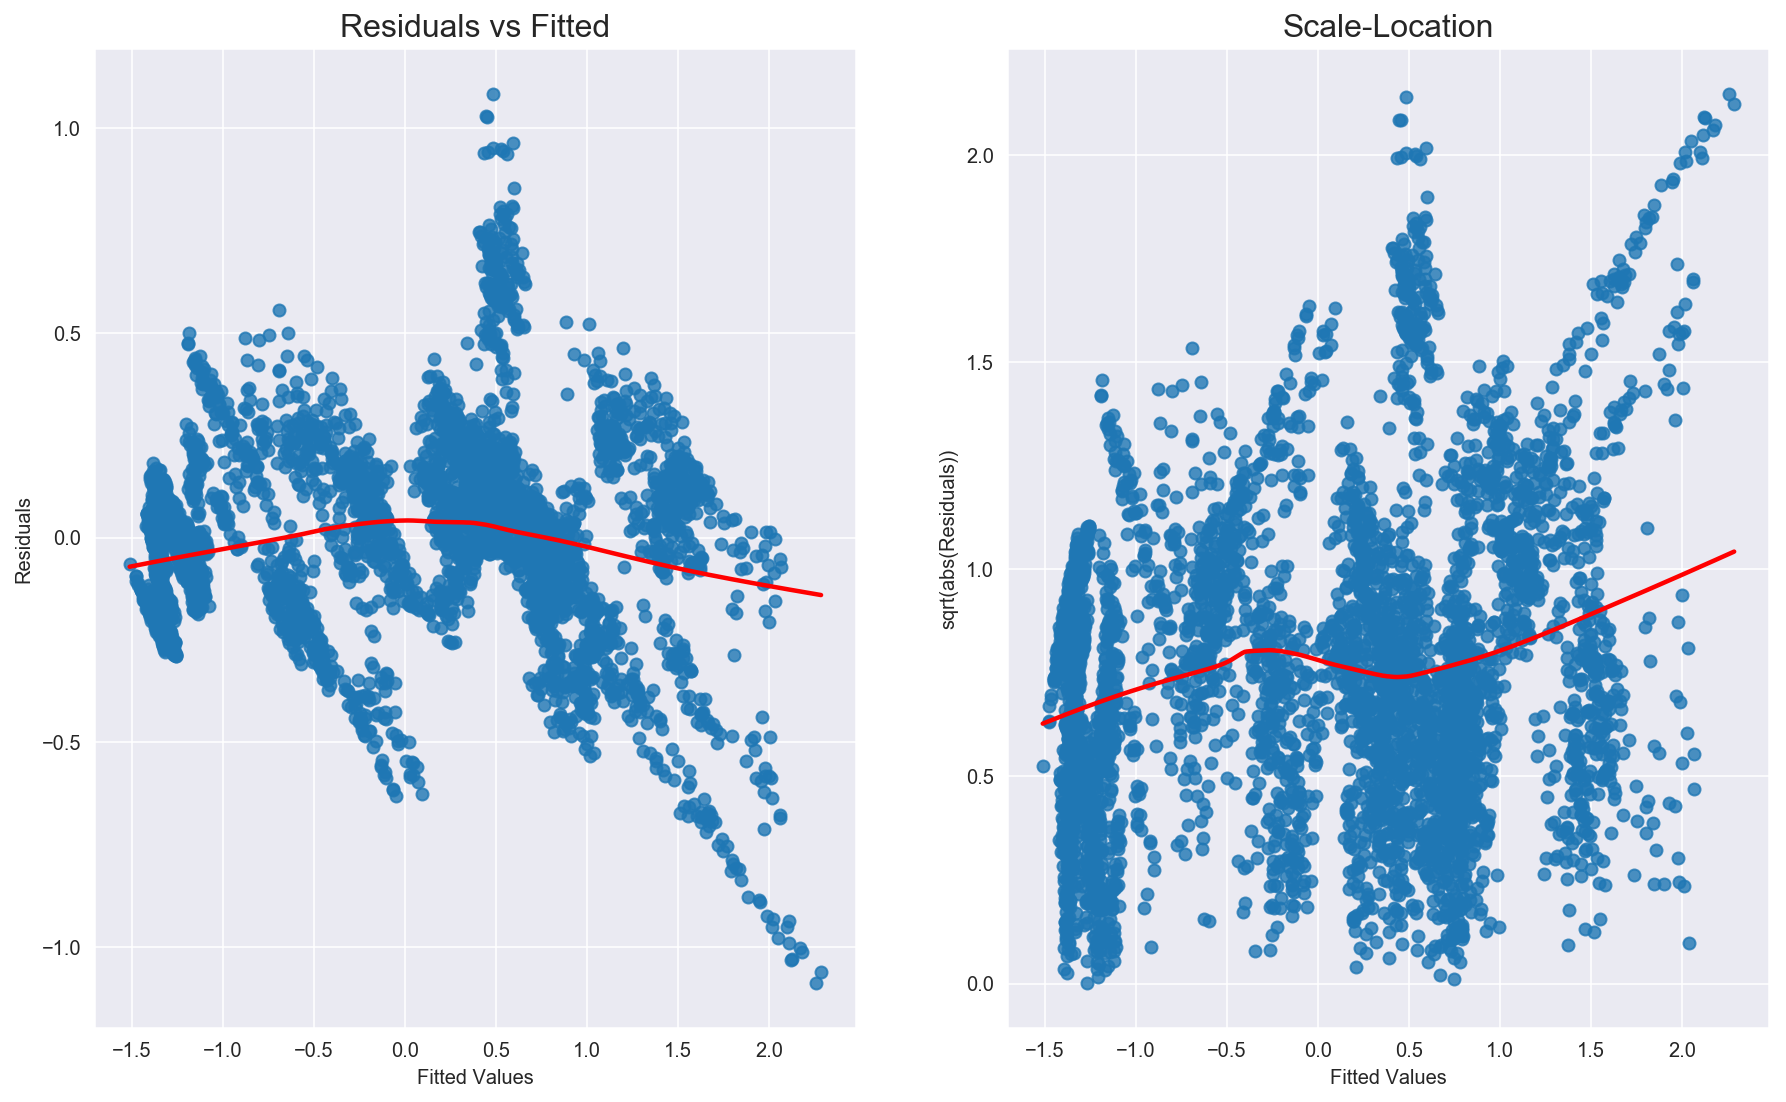

In [33]:
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    import numpy as np
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

print ("Homocedasticidad (varianza igual) de residuos")
homoscedasticity_test(modeloOLS)

Autocorrelación


C:\ProgramData\Anaconda3\envs\dhdsblendv2\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


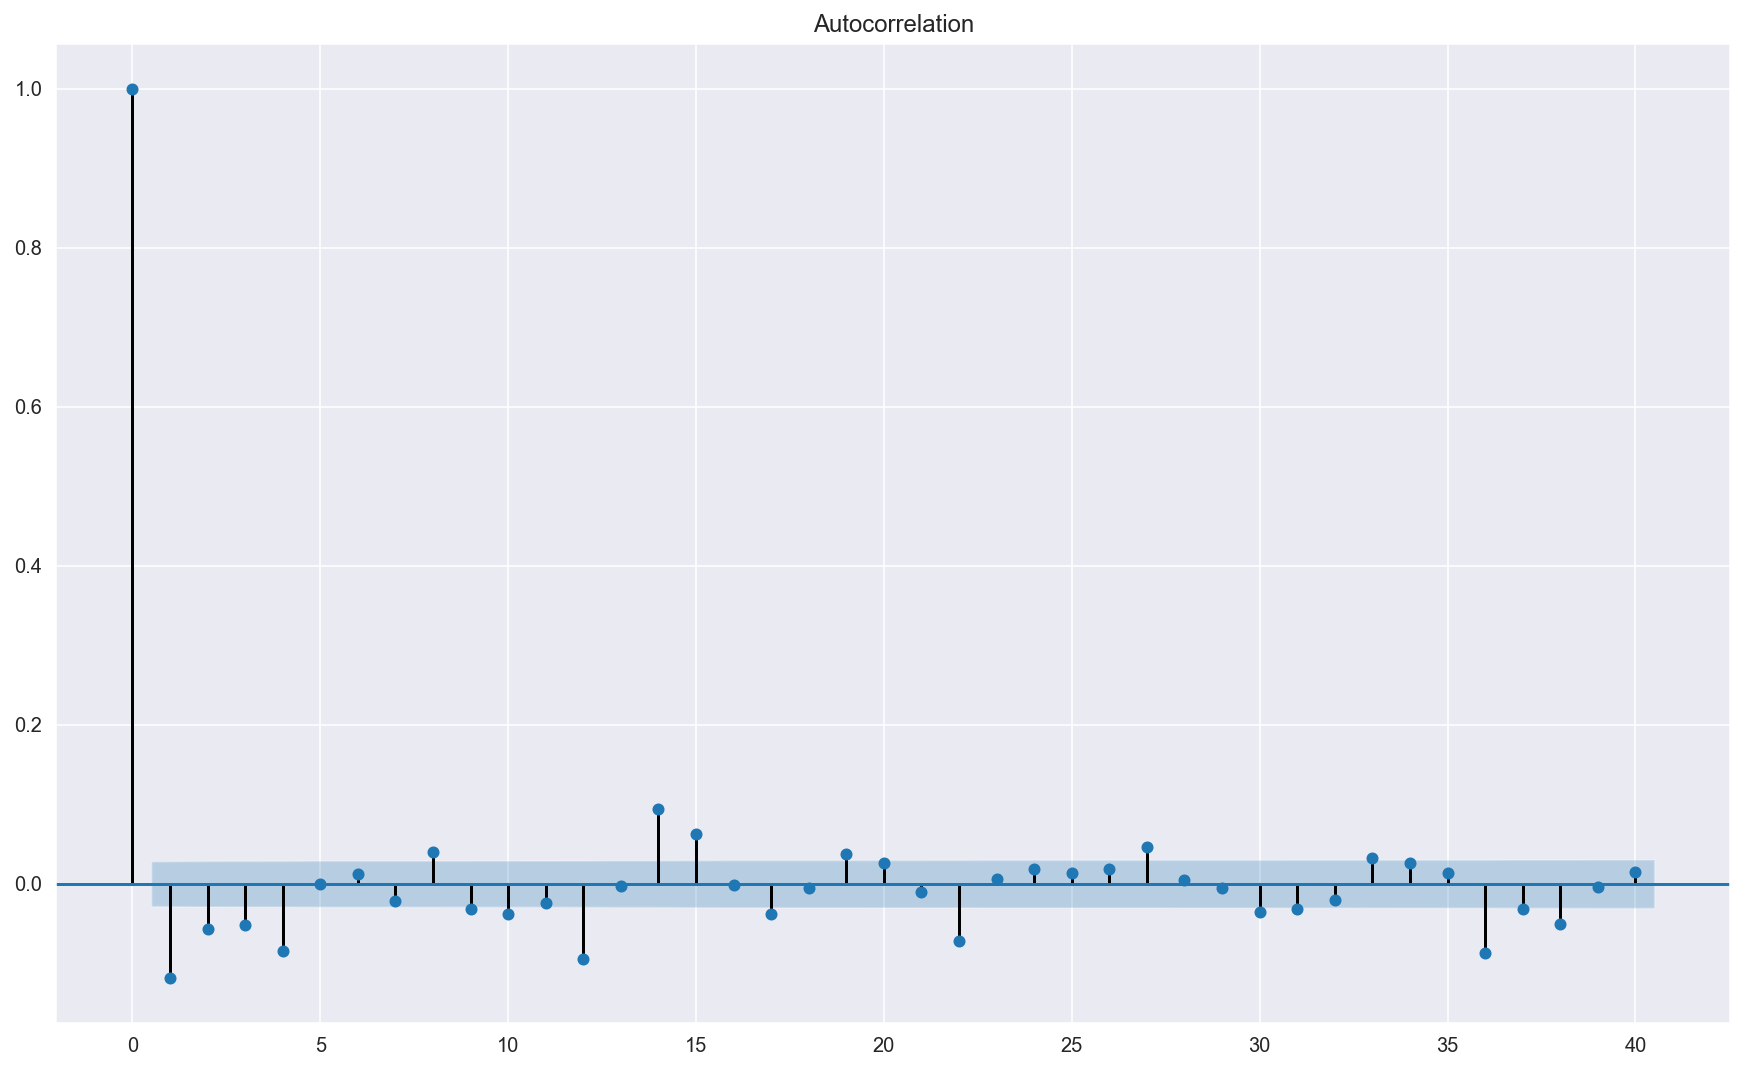

In [34]:
import statsmodels.tsa.api as smt

print ("Autocorrelación")
acf = smt.graphics.plot_acf(modeloOLS.resid, lags=40 , alpha=0.05)
acf.show()

Normalidad de los residuos
Jarque-Bera test ---- statistic: 1045.6974, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9682, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3113, p-value: 0.0000
Anderson-Darling test ---- statistic: 34.7390, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


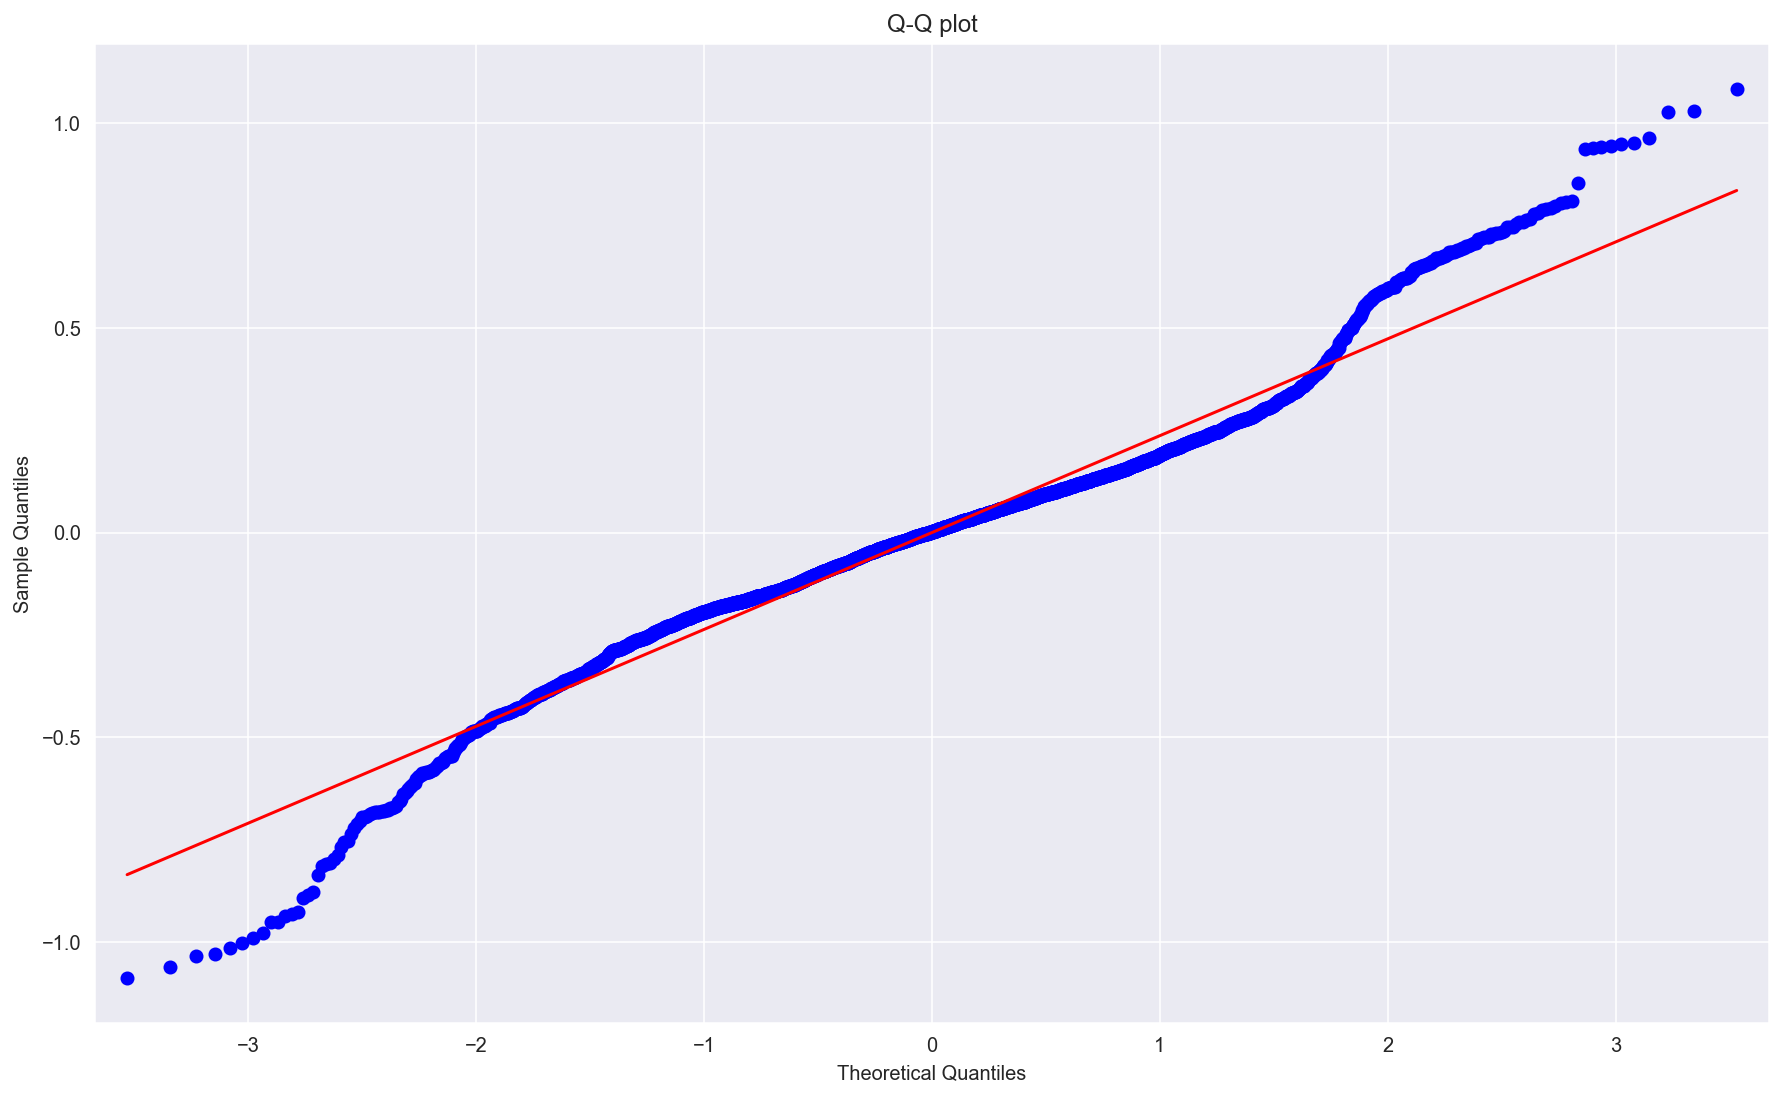

In [35]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
print ("Normalidad de los residuos")
normality_of_residuals_test(modeloOLS)